# Gradient Descent

In this assignment we'll implementing linear regression, using gradient descent, mini-batch gradient descent, and stochatstic gradient descent.

You will also learn how to create a synthetic dataset to use to test your model.

## Learning objectives

* Implement a common ML algorithm and its variations
* Explore differences in run times and results for the variations
* Learn how to create synthetic data and how it can be used to test code

## Points
   
Points are awarded for working implementations of the algorithms that generate answers very close to what is expected. There may be slight variations due to implementation details. Partial credit may be given.

Be sure to comment your code for full credit!

## Generating synthetic linear data

In the following code, we generate a set of data points along a line

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
# here's a function that generates linear data
def genLinearData(x, slope, intercept):
    return slope * x + intercept

# and here's a function that adds Gaussian noise to a set of values
def addGaussianNoise(data, mu, sigma):
    ''' 
        data is the data to add noise to
        mu is the median of the Gaussian
        sigma is the standard deviation of the Gaussian
    '''
    return data + np.random.normal(mu, sigma, len(data))

In [3]:
# generate a data set for linear regression
numPoints = 500 # number of points

# evenly spaced x values
x = np.linspace(-2,2,numPoints)

# "true" y values, based on the slope, intercept, and x values
y = genLinearData(x, slope=5, intercept=-1)



Plot the data

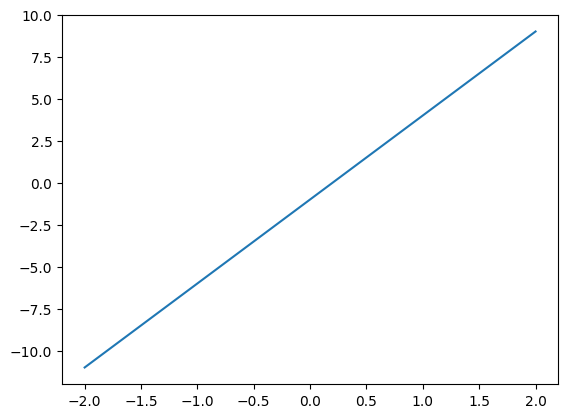

In [4]:
plt.plot(x,y)

Next, we add some Gaussian noise to the data

In [5]:
# add noise
# mu = 0
# sigma = 5
yNoisy = addGaussianNoise(y, 0, 5)

Plot the noisy data

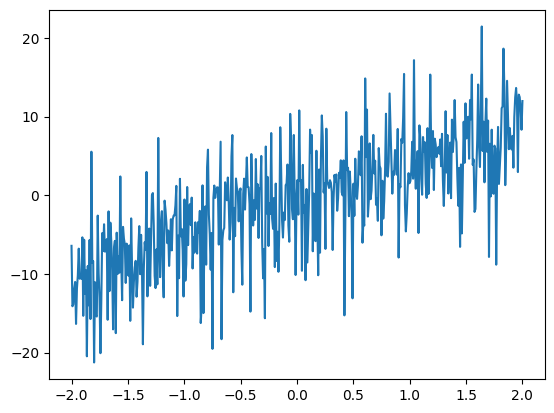

In [6]:
plt.plot(x,yNoisy)

Note: you can change the parameters to generate more or less data. You can increase or decrease the noise. You can change the slope and intercept to generate different linear data.  All of these options can be useful when you are debugging your code.

## Task One: Gradient Descent (25 points)

Implement Gradient Descent for linear regression, using all of the data at each iteration.

Use the mean squared error Loss function, as preseneted in class.

Be sure to use numPy arrays and vectorized functions for your implementation.

Your function should run for a specified number of iterations OR until the total change in parameters from one iteration to the next is less than or equal to a value, epsilon.

Return:

* the number of iterations actually run

* the final learning rate

* the predicted value for the slope

* the predicted value for the intercept


If you are having trouble debugging your code try the following:

* Reduce the number of points in the data

* Reduce the noise in the data
 
* Start your search closer to the solution values


In [7]:
# gradient descent
def gd(X, Y, startM, startB, numIters, epsilon, lRate):
    """
    gradient descent algorithm for linear regression using mean squared error. 
    Uses all of the data in each iteration
    
     Returns
        The number of iterations run
        The final value of lRate
        The final prediction for the slope
        The final prediction for the intercept

    Parameters:
        X - input data
        Y - true output data
        startM - starting value for the line slope
        startB - starting value for the line intercept
        numIters - maximum number of iterations to run
        epsilon - Stopping condition: change in loss function from iteration to iteration
        lRate - learning rate
    """
    # your code here
    m = startM
    b = startB
    diff = np.inf
    for i in range(numIters):
      if abs(diff) <= epsilon:
        iter = i + 1
        break
      else:
        MSE = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        change_m = - (2 / len(X)) * ((X * (Y - X * m - b)).sum())
        change_b = - (2 / len(X)) * ((Y - X * m - b).sum())
        m = m - lRate * change_m
        b = b - lRate * change_b
        MSE_next = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        diff = MSE_next - MSE
    return (iter, m, b)

### Run your implementation of Gradient Descent

Generate data using the following parameters:

* x range: -2 to 2
* 500 points
* slope = 5
* intercept = -1

Gaussian noise:
* mu = 0
* sigma = 5

Run your implementation of gradient descent on data generated with these aforementioned parameters. 

Start with values 
* slope = -12
* intercept = 0
* max iterations = 1000
* epsilon = .01
* learning rate = 0.1

In [8]:
# set the seed before generating the data and running your algorithm
np.random.seed(553)

numPoints = 500
# evenly spaced x values
x = np.linspace(-2,2,numPoints)
y = genLinearData(x, slope=5, intercept=-1)
yNoisy = yNoisy = addGaussianNoise(y, mu=0, sigma=5)


In [9]:
start = time.time()
iters, myM, myB = gd(x, yNoisy, startM=-12, startB=0, numIters=1000, epsilon=.01, lRate=0.1)
end = time.time()

print('time: ', round(end - start,4))
print('m: ', round(myM,2), 
      'b: ', round(myB,2),
      'iters: ', iters)

time:  0.0105
m:  4.58 b:  -1.11 iters:  18


## Task Two Gradient Descent with Bold Driver (15 points)

Now, implement gradient descent using the Bold Driver algorithm as described in class. That is, if the value of the objective function increases in an iteration, don't change the parameters and halve the learning rate. If it decreases, update the parameters and multiply the learning rate by 1.1.

Return:

* the number of iterations actually run

* the final learning rate

* the predicted value for the slope

* the predicted value for the intercept


In [10]:
def gdBoldDriver(X, Y, startM, startB, numIters, epsilon, lRate):
    """
    gradient descent algorithm for linear regression using mean squared error. 
    Uses all of the data in each iteration.
    Implements the Bold Driver algorithm
    Returns
        The number of iterations run
        The final learning rate
        The final prediction for the slope
        The final prediction for the intercept
    
    Parameters:
        X - input data
        Y - true output data
        startM - starting value for the line slope
        startB - starting value for the line intercept
        numIters - maximum number of iterations to run
        epsilon - Stopping condition: change in loss function from iteration to iteration
        lRate - learning rate
    """
    m = startM
    b = startB
    diff = np.inf
    for i in range(numIters):
      if abs(diff) <= epsilon:
        iter = i + 1
        break
      else:
        MSE = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        change_m = - (2 / len(X)) * ((X * (Y - X * m - b)).sum())
        change_b = - (2 / len(X)) * ((Y - X * m - b).sum())
        m = m - lRate * change_m
        b = b - lRate * change_b
        MSE_next = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        diff = MSE_next - MSE
        if diff < 0:
          lRate = lRate * 1.1
        else:
          # turn m and b to m and b in the last step
          m = m + lRate * change_m
          b = b + lRate * change_b
          lRate = lRate * 0.5
            
    return (iter, lRate, m, b)

### Run your implementation of Gradient Descent with Bold Driver 

using the same parameters as last time

In [11]:
start = time.time()
iters, lRate, myM, myB = gdBoldDriver(x, yNoisy, startM=-12, startB=0, numIters=1000, epsilon=.01, lRate=0.1)
end = time.time()

print('time: ', round(end - start,4))
print('m: ', round(myM,2), 
      'b: ', round(myB,2),
      'iters: ', iters, 
      'lambda: ', round(lRate,4))

time:  0.0084
m:  4.64 b:  -1.12 iters:  12 lambda:  0.2853


## Task Three: Mini-batch Gradient Descent (5 points)

Implement mini-batch Gradient Descent for linear regression, using a parameterized batch size at each iteration. Also, add a flag that indicates if Bold Driver should be used.

To ensure that we all end up with the same answer, please use the numpy random function ```choice``` to select your mini-batch. More information on this function can be found here: [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).  We have given you some code that samples random indexes from the number of data points without replacement.

Return:

* the number of iterations actually run

* the final learning rate

* the predicted value for the slope

* the predicted value for the intercept



In [12]:
def gdMiniBatch(X, Y, startM, startB, numIters, epsilon, lRate, batchSize, withBD):
    """
    Mini batch gradient descent algorithm for linear regression using mean squared error. 
    Uses a random selection of batchSize data points in each iteration.
    Returns
        The number of iterations run
        The final learning rate
        The final prediction for the slope
        The final prediction for the intercept
    
    Parameters:
        X - input data
        Y - true output data
        startM - starting value for the line slope
        startB - starting value for the line intercept
        numIters - maximum number of iterations to run
        epsilon - Stopping condition: change in loss function from iteration to iteration
        lRate - starting learning rate
        batchSize - the number of points to use at each iteration
        withBD - flag set to 1 if Bold Driver should be used
    """
    # dataset size
    n = len(X)
    
    # your code here
    m = startM
    b = startB
    diff = np.inf
    iter = 0

    while abs(diff) > epsilon and iter <= numIters:
        # randomly select a batch
        # this code gives you a set of indexes you can use on X and Y 
        thisBatch = np.random.choice(n, batchSize, replace=False)

        iter += 1
        # calculate current MSE
        MSE = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        # update parameters
        change_m = - (2 / len(thisBatch)) * ((X[thisBatch] * (Y[thisBatch] - X[thisBatch] * m - b)).sum())
        change_b = - (2 / len(thisBatch)) * ((Y[thisBatch] - X[thisBatch] * m - b).sum())
        m = m - lRate * change_m
        b = b - lRate * change_b
        # calculate next MSE
        MSE_next = np.array([diff ** 2 for diff in (X * m + b - Y)]).sum() / len(X)
        diff = MSE_next - MSE
        if withBD:
          if diff < 0:
            lRate = lRate * 1.1
          else:
            # turn m and b to m and b in the last step
            m = m + lRate * change_m
            b = b + lRate * change_b
            lRate = lRate * 0.5   

    return (iter, lRate, m, b)

### Run your implementation of Mini-batch Gradient Descent 

using the same parameters as last time.

This time, since the process is stochatic, call your function 100 times and report back the average of the return values. 

**Count and report the number of times the values did not converge within the specified number of iterations.**

If the iteration did not converge, do NOT average in the values for that iteration. We have given you most of the code for this task.

Run Mini-Batch Gradient Descent without Bold Driver, using a batch size of 10.

In [13]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 100
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(x, yNoisy, startM=-12, startB=0, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 10, withBD=0)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.0579
m:  4.62 b:  -1.09 iters:  41.0 lambda:  0.1 total misses:  0


### Run Mini-Batch Gradient Descent **with Bold Driver**, using a batch size of 10.

In [14]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 100
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(x, yNoisy, startM=-12, startB=0, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 10, withBD=1)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.0187
m:  4.56 b:  -1.07 iters:  16.0 lambda:  0.0224 total misses:  0


## Task Four: Stochastic Gradient Descent (3 points)

Stochastic Gradient Descent is just mini-batch GD, run with a batch size of 1.

Run your algorithm **without Bold Driver** using a batch size of 1. Again, run the algorithm 100 times and report back averages.

**Count and report the number of times the values did not converge within the specified number of iterations.**

If the iteration did not converge, do NOT average in the values for that iteration.


In [15]:
# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 100
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(x, yNoisy, startM=-12, startB=0, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize=1, withBD=0)
    end = time.time()

    if np.isnan(iters):
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.1553
m:  4.79 b:  -1.31 iters:  137.0 lambda:  0.1 total misses:  0


### Run your implementation of Stochastic Gradient Descent with Bold Driver

Run your algorithm **with Bold Driver** using a batch size of 1. Again, run the algorithm 100 times and report back averages.


In [16]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 100
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(x, yNoisy, startM=-12, startB=0, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize=1, withBD=1)
    end = time.time()

    if iters == 999:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),6),
      'total misses: ', totalMisses)

time:  0.0098
m:  3.97 b:  -0.99 iters:  19.0 lambda:  0.009766 total misses:  0


## Task Five: Unknown data (2 points) 

Now that you are sure your algorithm is working, run it on some data for which you do not know the answer.

### Read in the data

In [17]:
import pandas as pd
from google.colab import files

# you may get an error if you do not have 3rd party cookies enabled
# you may use the files pane on the left to upload the file instead
files.upload()

df = pd.read_csv('GDdata.csv',header=None, names=['newX', 'newY'])
df

Saving GDdata.csv to GDdata.csv


,newX,newY
0,3.854910,-0.943551
1,4.328733,-0.096756
2,2.703129,-1.181450
3,3.865701,-1.106943
4,3.057061,-1.346455
...,...,...
995,3.887134,-0.752506
996,1.642806,-1.895202
997,3.875776,-0.666263
998,2.542470,-1.672543


### Plot the data. This should give you a sanity check on what the slope and intercept values might be

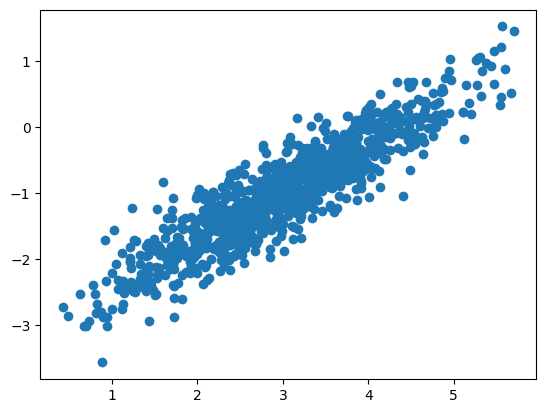

In [18]:
plt.scatter(df['newX'],df['newY'])

Start your algorithm with:

* slope = -1
* intercept = -4
* learning rate 0.01
* max iterations 10000

### Run Gradient Descent on the data

In [19]:
start = time.time()
iters, myM, myB = gd(df['newX'], df['newY'], startM=-1, startB=-4, numIters=10000, epsilon=.01, lRate=.01)
end = time.time()

print('time: ', round(end - start,4))
print('m: ', round(myM,2), 
      'b: ', round(myB,2),
      'iters: ', iters)

time:  0.0506
m:  0.77 b:  -3.45 iters:  17


### Run Gradient Descent with Bold Driver on the data

In [20]:
start = time.time()
iters, lRate, myM, myB = gdBoldDriver(df['newX'], df['newY'], startM=-1, startB=-4, numIters=500, epsilon=.01, lRate=0.01)
end = time.time()
print('time: ', round(end - start,4))
print('m: ', round(myM,2), 
      'b: ', round(myB,2),
      'iters: ', iters, 
      'lambda: ', round(lRate,4))

time:  0.0295
m:  0.8 b:  -3.44 iters:  12 lambda:  0.0285


### Run Mini-batch Gradient Descent on the data

Run 50 iterations and report average results


In [21]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 50
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(df['newX'], df['newY'], startM=-1, startB=-4, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 10, withBD=0)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.1364
m:  0.77 b:  -3.28 iters:  32.0 lambda:  0.1 total misses:  48


### Run Mini-batch Gradient Descent with Bold Driver on the data

Run 50 iterations and report average results

In [22]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 50
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(df['newX'], df['newY'], startM=-1, startB=-4, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 10, withBD=1)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.037
m:  0.8 b:  -3.43 iters:  6.0 lambda:  0.0357 total misses:  0


### Run Stochastic Gradient Descent on the data



In [23]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 50
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(df['newX'], df['newY'], startM=-1, startB=-4, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 1, withBD=0)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.6861
m:  1.38 b:  -5.12 iters:  128.0 lambda:  0.1 total misses:  26


### Run Stochastic Gradient Descent with Bold Driver on the data

In [24]:
# since this approach is stochastic, set the seed again, so we all get the same answers
np.random.seed(553)

# keep track of values across iterations
totalTime = 0
totalIters = 0
totalLRate = 0
totalM = 0
totalB = 0
totalMisses = 0

numTimes = 50
for iter in range(numTimes):
    start = time.time()
    iters, lRate, myM, myB = gdMiniBatch(df['newX'], df['newY'], startM=-1, startB=-4, numIters=1000, \
                                         epsilon=.01, lRate=0.1, batchSize = 1, withBD=1)
    end = time.time()

    if iters == 1001:
        totalMisses += 1
    else:
        totalTime += end - start
        totalIters += iters
        totalLRate += lRate
        totalM += myM
        totalB += myB

print('time: ', round(totalTime/(numTimes-totalMisses),4))
print('m: ', round(totalM/(numTimes-totalMisses),2), 
      'b: ', round(totalB/(numTimes-totalMisses),2),
      'iters: ', round(totalIters/(numTimes-totalMisses),0), 
      'lambda: ', round(totalLRate/(numTimes-totalMisses),4),
      'total misses: ', totalMisses)

time:  0.0479
m:  0.78 b:  -3.33 iters:  8.0 lambda:  0.023 total misses:  0
